# Complex Signals


In [1]:
from causalinfo import *
from causalinfo.variables import JointDist, JointDistByState, UniformDist

In [2]:
# You only need this if you want to draw pretty pictures of the Networks
from nxpd import draw, nxpdParams
nxpdParams['show'] = 'ipynb'

In [3]:
def merge1(i1, i2, o1):
    if i2:
        # Perfect spec
        o1[i1] = 1.0
    else:
        o1[i1/2] = 1.0

def merge2(i1, i2, o1):
    if i1:
        # Perfect spec
        o1[i2] = 1.0
    else:
        if i2 == 0:
            o1[1] = 1.0
        elif i2 == 1:
            o1[0] = 1.0
        else:
            o1[i2] = 1.0


In [4]:
c1, s1, s3, a = make_variables('C1 S1 S3 A', 4)
c2, s2, c3, s4, s5 = make_variables('C2 S2 C3 S4 S5', 2)
eq1 = Equation('Send1', [c1], [s1], mappings.f_same)
eq2 = Equation('Send2', [c2], [s2], mappings.f_same)
eq3 = Equation('Rec1', [s2, s1], [s4], merge1)
eq4 = Equation('Rec2', [c3], [s3], mappings.f_same)
eq5 = Equation('Rec3', [s3, s4], [a], merge2)
network = CausalNetwork([eq1, eq2, eq3, eq4, eq5])



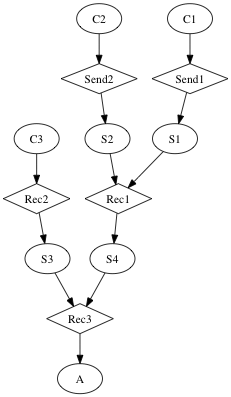

In [5]:
draw(network.full_network)

In [6]:
from causalinfo.measure import Measure

In [26]:
root_dist = JointDist({c1: [.5, .2, .2, .1], c2: [.2, .8], c3: [.4, .6]})
m = Measure(network, root_dist)

In [27]:
print m.causal_flow(s2, a, [s1, s3])
print m.average_sad(s2, a)

0.360964047444
0.360964047444


In [28]:
print m.causal_flow(s1, a, [s2, s3])
print m.average_sad(s1, a)

0.8
0.8


In [29]:
print m.average_sad(s3, a)
print m.causal_flow(s3, a, s4)
print m.causal_flow(s3, a, [s2, s1])

0.970950594455
0.970950594455
0.970950594455
